In [1]:
import numpy as np
from source_helper import *
import matplotlib.pyplot as plt
% matplotlib inline
from time import time
from lapl_well import LaplWell
from helper import Helper
from old_helper import OldHelper

In [2]:
xwd = 0.
ywd = 0.
zwd = 0.
outer_bound = "infinite"
top_bound = "imp"
bottom_bound = "imp"
wtype = "frac"
params = {"nseg": 10, "kx": 1., "ky": 1., "kz": 1., "omega": 1, "lambda": 1, "Fcd":1}
well = LaplWell(xwd, ywd, zwd, outer_bound, top_bound, bottom_bound, wtype, params)

### Here I cheked right parts

In [3]:
from well import Well
import pandas as pd

In [4]:
ref_df = pd.read_csv('./calibration_points.csv', sep=";", decimal=',')
y_true = ref_df.iloc[:,[2]]
Fcd = float(y_true.columns[0].replace(',', '.'))
ts = np.array(ref_df["Td_xf"])
print("Fcd = {}".format(Fcd))

Fcd = 3.141592654


In [19]:
xw = 0
yw = 0
outer_bound = "infinite"
top_bound = "imp"
bottom_bound = "imp"
wtype = "frac"
n_stehf = 12
params = {"nseg": 40, "kx": 1., "ky": 1., "kz": 1., "omega": 1, "lambda": 1, "Fcd":Fcd, "ref_length":1.,
         "z_ref_length": 1}
real_well = Well(xw, yw, outer_bound, top_bound, bottom_bound, wtype, params, n_stehf)

In [20]:
y_pred_new = []
for t in ts:
    y_pred_new.append(real_well.get_pw(t))

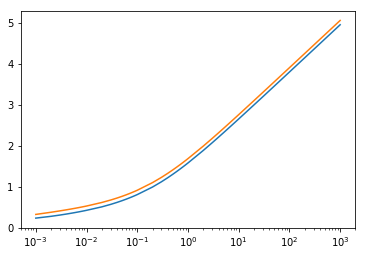

In [21]:
plt.xscale("log")
plt.plot(ts,y_true)
plt.plot(ts, y_pred_new)

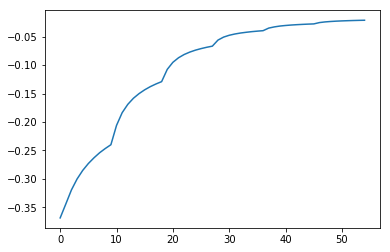

In [22]:
dx = (np.array(y_true).flatten() - y_pred_new)/np.array(y_true).flatten()
dx.shape
plt.plot(dx)

In [8]:
ss = np.log(2.)/np.logspace(-3,1,5)

In [9]:
s = ss[-2]
real_well.lapl_well.recalc(s)
new_src = real_well.lapl_well.source_distrib

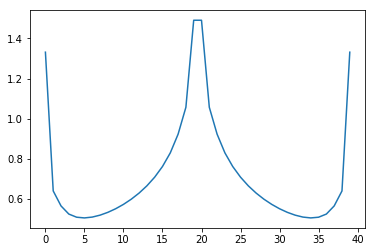

In [10]:
#plt.plot(old_src)
plt.plot(new_src)